# Lab 2: Clasificación Binaria

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FCEIA-AAII/lab2/blob/main/solucion-a.ipynb)

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [120]:
import os

REPO_NAME = "lab2"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)



## Análisis Exploratorio.

Importar librerías

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

Cargar y visualizar los datos.

In [122]:
data = pd.read_csv('dataset-lab2.csv')
print(data.head())

         X1        X2    Y
0  0.812761  0.739781  1.0
1  0.812057  0.259719  1.0
2  0.857711  0.434979  1.0
3  0.460648  0.432698  0.0
4  0.776138  0.635665  1.0


Plot de los datos.

X1 shape: (1000,)
X2 shape: (1000,)
Y shape: (1000,)


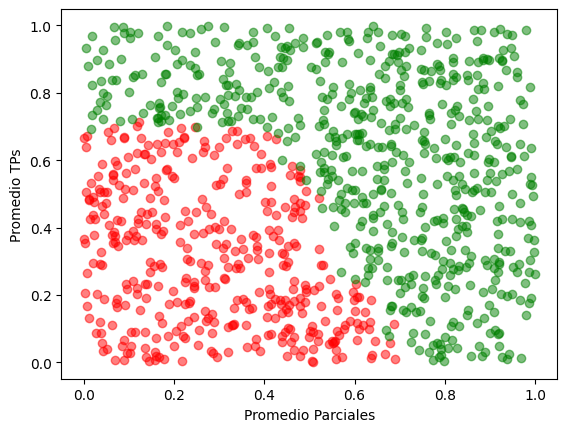

In [123]:
X1 = data['X1'].to_numpy()
X2 = data['X2'].to_numpy()
Y = data['Y'].to_numpy()

print("X1 shape:", X1.shape)
print("X2 shape:", X2.shape)
print("Y shape:", Y.shape)

plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)

plt.xlabel('Promedio Parciales')
plt.ylabel('Promedio TPs')

plt.show()

Definimos nuestro modelo usando tensorflow.

In [124]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

Definimos una función para plotear la frontera de decisión sobre los datos.

313/313 [==============================] - 0s 559us/step


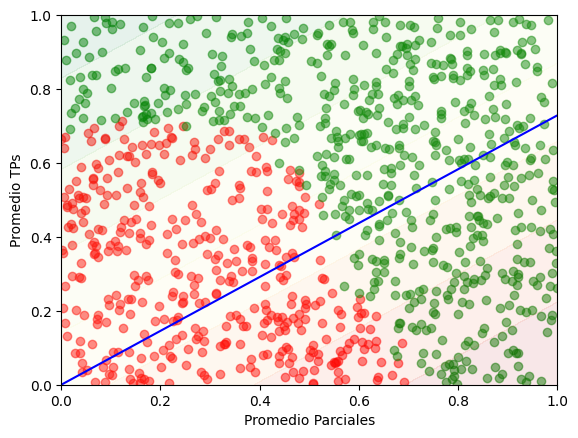

In [125]:
def plot_results(X1, X2, Y, model):
    plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
    plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)

    plt.xlabel('Promedio Parciales')
    plt.ylabel('Promedio TPs')

    x1 = np.linspace(0, 1, 100)
    x2 = np.linspace(0, 1, 100)

    # Create a meshgrid with all the possible combinations of x1 and x2
    x1, x2 = np.meshgrid(x1, x2, indexing='ij')

    # This is equivalent to
    # x = np.array([[i, j] for i in x1 for j in x2])
    x = np.array([x1.ravel(), x2.ravel()]).T

    # Predict the value for each point in the meshgrid
    y = model.predict(x).reshape(x1.shape)

    # Use cmap red and green
    plt.contourf(x1, x2, y, alpha=0.1, cmap='RdYlGn')

    # Draw the decision boundary
    plt.contour(x1, x2, y, levels=[0.5], colors='blue')

    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.show()

plot_results(X1, X2, Y, model)

Entrenamos el modelo.

In [126]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

x = np.column_stack([X1, X2])
y = Y
print(x.shape)
print(y.shape)
model.fit(x=x, y=y, epochs=50)

(1000, 2)
(1000,)
Epoch 1/50
32/32 [==============================] - 0s 702us/step - loss: 0.3816 - accuracy: 0.8370
Epoch 2/50
32/32 [==============================] - 0s 644us/step - loss: 0.2276 - accuracy: 0.9200
Epoch 3/50
32/32 [==============================] - 0s 673us/step - loss: 0.2033 - accuracy: 0.9130
Epoch 4/50
32/32 [==============================] - 0s 665us/step - loss: 0.2097 - accuracy: 0.9120
Epoch 5/50
32/32 [==============================] - 0s 634us/step - loss: 0.1993 - accuracy: 0.9040
Epoch 6/50
32/32 [==============================] - 0s 684us/step - loss: 0.1908 - accuracy: 0.9140
Epoch 7/50
32/32 [==============================] - 0s 760us/step - loss: 0.1770 - accuracy: 0.9240
Epoch 8/50
32/32 [==============================] - 0s 642us/step - loss: 0.1826 - accuracy: 0.9130
Epoch 9/50
32/32 [==============================] - 0s 617us/step - loss: 0.1778 - accuracy: 0.9260
Epoch 10/50
32/32 [==============================] - 0s 662us/step - loss: 0.1807 

Plot de la frontera de decisión.

  1/313 [..............................] - ETA: 7s

313/313 [==============================] - 0s 614us/step


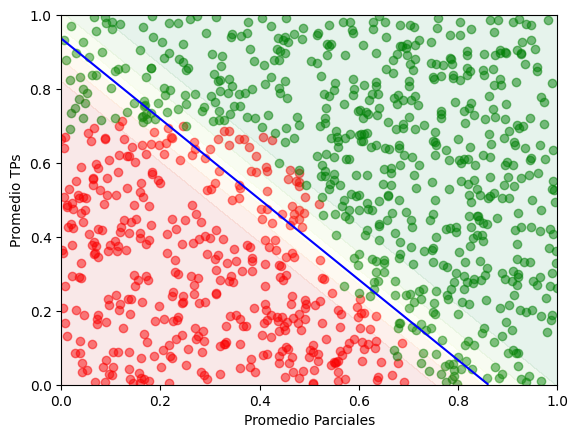

In [127]:
plot_results(X1, X2, Y, model)

Vemos que el modelo no tiene la complejidad suficiente como para representar la frontera de decisión.

Probemos entonces con un modelo más complejo.

*Nota: el entrenamiento puede no converger a una solución óptima. Se propone correr el entrenamiento varias veces hasta que se obtenga una solución aceptable. Más adelante estudiaremos técnicas para mejorar la convergencia.*

Epoch 1/50


32/32 [==============================] - 0s 760us/step - loss: 0.4583 - accuracy: 0.7670
Epoch 2/50
32/32 [==============================] - 0s 666us/step - loss: 0.2114 - accuracy: 0.9040
Epoch 3/50
32/32 [==============================] - 0s 619us/step - loss: 0.1815 - accuracy: 0.9200
Epoch 4/50
32/32 [==============================] - 0s 737us/step - loss: 0.1587 - accuracy: 0.9370
Epoch 5/50
32/32 [==============================] - 0s 952us/step - loss: 0.1509 - accuracy: 0.9320
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1283 - accuracy: 0.9440
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.9510
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.9550
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1087 - accuracy: 0.9560
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1473 - accuracy: 0.9350
Epoch 11/50
32/32 [=

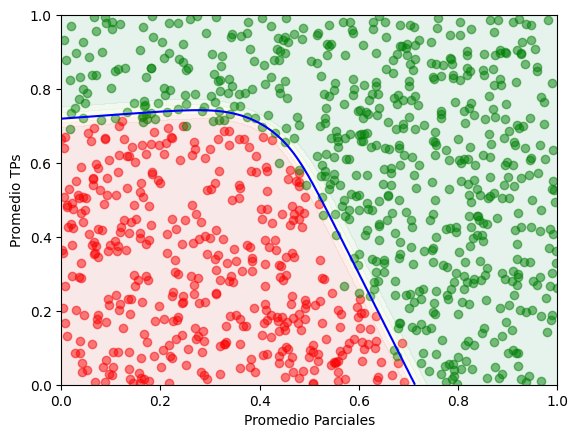

In [128]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=2, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x=x, y=y, epochs=50)

plot_results(X1, X2, Y, model)